In [66]:
import torch
import numpy as np
import os

import pandas as pd
from tqdm.auto import tqdm
from pathlib import Path

In [53]:
import numpy as np
from nilearn import surface
from nilearn import datasets
import cortex
import matplotlib.pyplot as plt
import os

In [54]:
cortex.download_subject('fsaverage', download_again=False)

/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/cortex/utils.py:1014: UserWarning: fsaverage is already present in the database. Set download_again to True if you wish to download the subject again.
  warnings.warn(


In [55]:
mask_img = 'config/reliable_voxel_mask.nii'

In [56]:
voxel_masks = np.load('config/voxel_masks.npy')

In [57]:
baseline_score_dict = torch.load('tmp/notebook910/baseline_score_dict.pt')

In [58]:
baseline_score_dict

{'single layer best': tensor([-0.2450, -0.1718,  0.1759,  ...,  0.7410,  0.9357,  0.9613],
        dtype=torch.float64),
 'multi layer': tensor([0.1266, 0.0156, 0.1701,  ..., 0.6980, 1.0006, 1.0208],
        dtype=torch.float64),
 'ours ensemble': tensor([0.0702, 0.0577, 0.2748,  ..., 0.8291, 1.0439, 1.0580],
        dtype=torch.float64)}

In [59]:
voxel_scores_dict = torch.load('tmp/notebook910/voxel_scores_dict.py')

In [60]:
voxel_scores_dict

{'htROI': tensor([0.3130, 0.2397, 0.1140,  ..., 0.6482, 0.9716, 1.1179],
        dtype=torch.float64),
 'WB': tensor([0.0720, 0.0030, 0.2601,  ..., 0.8192, 1.0208, 1.0374],
        dtype=torch.float64),
 'WB+htROI': tensor([0.2467, 0.1899, 0.1941,  ..., 0.7150, 1.0008, 1.1022],
        dtype=torch.float64),
 'WB+aROI': tensor([-0.0865,  0.0412,  0.1824,  ...,  0.8112,  0.9802,  1.0164],
        dtype=torch.float64),
 'WB+aROI+htROI': tensor([0.1679, 0.1921, 0.1567,  ..., 0.7016, 0.9756, 1.0938],
        dtype=torch.float64),
 'aROI': tensor([-0.2797,  0.0738,  0.0978,  ...,  0.7910,  0.9255,  0.9859],
        dtype=torch.float64),
 'aROI+htROI': tensor([0.1137, 0.2031, 0.1149,  ..., 0.7027, 0.9665, 1.0867],
        dtype=torch.float64)}

In [61]:
from matplotlib import pyplot as plt
from src.utils.visulization import save_voxel_data_as_subject_mean_nii

fsaverage = 'fsaverage'
# fsaverage = 'fsaverage5'
cmap = 'PuOr'
vmax = 0.5
inflate = True

In [62]:
mkdir tmp/notebook911

mkdir: cannot create directory ‘tmp/notebook911’: File exists


In [63]:
plot_atlases = ['aROI+htROI', 'aROI', 'htROI']

In [64]:
def save_fig(vertex_data, path, with_rois=True, with_labels=True, with_sulci=True):
    fig = cortex.quickflat.make_figure(vertex_data,
                                   with_curvature=False,
                                   with_rois=with_rois,
                                   with_labels=with_labels,
                                   with_sulci=with_sulci,
                                   with_colorbar=False,)
    # Add sulci in light yellow
    _ = cortex.quickflat.composite.add_sulci(fig, vertex_data,
                                             with_labels=with_labels,)
    # Add all rois, with a particular color scheme:
    # _ = cortex.quickflat.composite.add_rois(fig, volume,
    #                                         with_labels=True,
    #                                         labelsize=1,)
    # # Highlight face- and body-selective ROIs:
    # _ = cortex.quickflat.composite.add_rois(fig, volume,
    #                                         roi_list=['FFA', 'EBA', 'OFA'],  # (This defaults to all rois if not specified)
    #                                         with_labels=True,
    #                                         linewidth=5,
    #                                         linecolor=(0.9, 0.5, 0.5),
    #                                         labelcolor=(0.9, 0.5, 0.5),
    #                                         labelsize=20,
    #                                         roifill=(0.9, 0.5, 0.5),
    #                                         fillalpha=0.35,
    #                                         dashes=(5, 3)                    # Dash length & gap btw dashes
    #                                         )
    plt.savefig(path, dpi=144)
    plt.close()

In [14]:
atlases = 'WB+aROI+htROI'
voxel_score = voxel_scores_dict[atlases]

tmp_nii_path = Path(f'tmp/notebook911/score.nii')
example_nii_path = Path('config/example.nii')

save_voxel_data_as_subject_mean_nii(voxel_masks, voxel_score, example_nii_path, tmp_nii_path)

fill_nan_value = 0
nii_path = str(tmp_nii_path)
fsaverage = datasets.fetch_surf_fsaverage('fsaverage')

texture = np.concatenate([surface.vol_to_surf(nii_path, fsaverage.pial_left, mask_img=mask_img),
                         surface.vol_to_surf(nii_path, fsaverage.pial_right, mask_img=mask_img)])
texture[np.isnan(texture)] = fill_nan_value


# This creates a Vertex object for our subject and test dataset
vertex_data = cortex.Vertex(texture, 'fsaverage')

vmax = 1
vmin = -1

vertex_data.vmax = vmax
vertex_data.vmin = vmin

cmap = 'seismic'
vertex_data.cmap = cmap


save_fig(vertex_data, 'tmp/notebook911/score best.png')

/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)


In [65]:
from src.utils.visulization import make_horizontal_color_bar

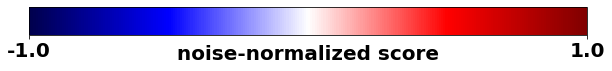

In [17]:
cbar_label_text = 'noise-normalized score'
cbar = make_horizontal_color_bar(cmap, vmax, vmin, cbar_label_text=cbar_label_text, offset=-0.7)
plt.savefig('tmp/notebook911/score best cbar.pdf', bbox_inches="tight")
plt.show()

In [50]:
for sch in ['multi layer']:
    voxel_score = baseline_score_dict['ours ensemble'] - baseline_score_dict[sch]

    tmp_nii_path = Path(f'tmp/notebook911/score.nii')
    example_nii_path = Path('config/example.nii')

    save_voxel_data_as_subject_mean_nii(voxel_masks, voxel_score, example_nii_path, tmp_nii_path)

    fill_nan_value = 0
    nii_path = str(tmp_nii_path)
    fsaverage = datasets.fetch_surf_fsaverage('fsaverage')

    texture = np.concatenate([surface.vol_to_surf(nii_path, fsaverage.pial_left, mask_img=mask_img),
                             surface.vol_to_surf(nii_path, fsaverage.pial_right, mask_img=mask_img)])
    texture[np.isnan(texture)] = fill_nan_value


    # This creates a Vertex object for our subject and test dataset
    vertex_data = cortex.Vertex(texture, 'fsaverage')

    vmax = 0.5
    vmin = -0.5
    
    vertex_data.vmax = vmax
    vertex_data.vmin = vmin
    
    cmap = 'seismic'
    vertex_data.cmap = cmap


#     cortex.quickflat.make_png(
#                 f'tmp/notebook911/score ours ensemble - {sch}.png',
#                 vertex_data, 
#                  with_sulci=False,
#                  with_rois=False,
#                  with_curvature=False,
#                  with_colorbar=False,
#                 dpi=350,
#                 )
    # cortex.quickshow(
    #             vertex_data, 
    #              with_sulci=False,
    #              with_rois=False,
    #              with_curvature=False,
    #              with_colorbar=False,
    #             )
    # plt.show()
    save_fig(vertex_data, f'tmp/notebook911/score ours ensemble - {sch}.png',
            with_rois=False, with_labels=False, with_sulci=False)

/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)


In [74]:
for atlases in ['aROI+htROI', 'WB+htROI', 'WB+aROI']:

    voxel_score = voxel_scores_dict['WB+aROI+htROI'] - voxel_scores_dict[atlases]

    tmp_nii_path = Path(f'tmp/notebook911/score.nii')
    example_nii_path = Path('config/example.nii')

    save_voxel_data_as_subject_mean_nii(voxel_masks, voxel_score, example_nii_path, tmp_nii_path)

    fill_nan_value = 0
    nii_path = str(tmp_nii_path)
    fsaverage = datasets.fetch_surf_fsaverage('fsaverage')

    texture = np.concatenate([surface.vol_to_surf(nii_path, fsaverage.pial_left, mask_img=mask_img),
                             surface.vol_to_surf(nii_path, fsaverage.pial_right, mask_img=mask_img)])
    texture[np.isnan(texture)] = fill_nan_value


    # This creates a Vertex object for our subject and test dataset
    vertex_data = cortex.Vertex(texture, 'fsaverage')

    vmax = 0.5
    vmin = -0.5

    vertex_data.vmax = vmax
    vertex_data.vmin = vmin

    cmap = 'seismic'
    vertex_data.cmap = cmap


    # cortex.quickflat.make_png(
    #             f'tmp/notebook911/score WB+aROI+htROI - WB.png',
    #             vertex_data, 
    #              with_sulci=True,
    #              with_rois=True,
    #              with_curvature=False,
    #              with_colorbar=False,
    #             dpi=350,
    #             )
    # cortex.quickshow(
    #             vertex_data, 
    #              with_sulci=False,
    #              with_rois=False,
    #              with_curvature=False,
    #              with_colorbar=False,
    #             )
    # plt.show()
    save_fig(vertex_data, f'tmp/notebook911/score WB+aROI+htROI - {atlases}.png',
                with_rois=False, with_labels=False, with_sulci=False)

/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice


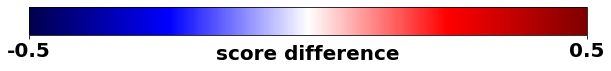

In [20]:
cbar_label_text = 'score difference'
cbar = make_horizontal_color_bar(cmap, vmax, vmin, cbar_label_text=cbar_label_text, offset=-0.7)
plt.savefig('tmp/notebook911/score diff cbar.pdf', bbox_inches="tight")
plt.show()

In [17]:
for atlases in ['aROI', 'htROI']:
    voxel_score = voxel_scores_dict['aROI+htROI'] - voxel_scores_dict[atlases]

    tmp_nii_path = Path(f'tmp/notebook911/score.nii')
    example_nii_path = Path('config/example.nii')

    save_voxel_data_as_subject_mean_nii(voxel_masks, voxel_score, example_nii_path, tmp_nii_path)

    fill_nan_value = 0
    nii_path = str(tmp_nii_path)
    fsaverage = datasets.fetch_surf_fsaverage('fsaverage')

    texture = np.concatenate([surface.vol_to_surf(nii_path, fsaverage.pial_left, mask_img=mask_img),
                             surface.vol_to_surf(nii_path, fsaverage.pial_right, mask_img=mask_img)])
    texture[np.isnan(texture)] = fill_nan_value


    # This creates a Vertex object for our subject and test dataset
    vertex_data = cortex.Vertex(texture, 'fsaverage')

    vmax = 0.5
    vmin = -0.5
    
    vertex_data.vmax = vmax
    vertex_data.vmin = vmin
    
    cmap = 'seismic'
    vertex_data.cmap = cmap


#     cortex.quickflat.make_png(
#                 f'tmp/notebook911/score best - {atlases}.png',
#                 vertex_data, 
#                  with_sulci=False,
#                  with_rois=False,
#                  with_curvature=False,
#                  with_colorbar=False,
#                 dpi=350,
#                 )
    # cortex.quickshow(
    #             vertex_data, 
    #              with_sulci=False,
    #              with_rois=False,
    #              with_curvature=False,
    #              with_colorbar=False,
    #             )
    # plt.show()
    save_fig(vertex_data, f'tmp/notebook911/score aROI+htROI - {atlases}.png')

/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)


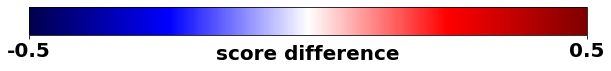

In [22]:
cbar_label_text = 'score difference'
cbar = make_horizontal_color_bar(cmap, vmax, vmin, cbar_label_text=cbar_label_text, offset=-0.7)
plt.savefig('tmp/notebook911/score diff cbar.pdf', bbox_inches="tight")
plt.show()

In [18]:
voxel_score = voxel_scores_dict['htROI'] - voxel_scores_dict['aROI']

tmp_nii_path = Path(f'tmp/notebook911/score.nii')
example_nii_path = Path('config/example.nii')

save_voxel_data_as_subject_mean_nii(voxel_masks, voxel_score, example_nii_path, tmp_nii_path)

fill_nan_value = 0
nii_path = str(tmp_nii_path)
fsaverage = datasets.fetch_surf_fsaverage('fsaverage')

texture = np.concatenate([surface.vol_to_surf(nii_path, fsaverage.pial_left, mask_img=mask_img),
                         surface.vol_to_surf(nii_path, fsaverage.pial_right, mask_img=mask_img)])
texture[np.isnan(texture)] = fill_nan_value


# This creates a Vertex object for our subject and test dataset
vertex_data = cortex.Vertex(texture, 'fsaverage')

vmax = 0.5
vmin = -0.5

vertex_data.vmax = vmax
vertex_data.vmin = vmin

cmap = 'seismic'
vertex_data.cmap = cmap


# cortex.quickflat.make_png(
#             f'tmp/notebook911/score WB+aROI+htROI - WB.png',
#             vertex_data, 
#              with_sulci=True,
#              with_rois=True,
#              with_curvature=False,
#              with_colorbar=False,
#             dpi=350,
#             )
# cortex.quickshow(
#             vertex_data, 
#              with_sulci=False,
#              with_rois=False,
#              with_curvature=False,
#              with_colorbar=False,
#             )
# plt.show()
save_fig(vertex_data, f'tmp/notebook911/score htROI - aROI.png')

/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)


# WB+aROI+htROI weights

In [67]:
import nibabel as nib

In [68]:
weights = torch.load('tmp/notebook200/WB+aROI+htROI weights.pt')

In [103]:
from  matplotlib.colors import LinearSegmentedColormap
c = ["grey","royalblue","cyan"]
v = [0,.5,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('my_colormap',l, N=256)

In [105]:
cmap = 'viridis'

In [106]:
rgb_textures = []
for i in range(3):
    w_ch = weights[:, i]
    save_voxel_data_as_subject_mean_nii(voxel_masks, w_ch, example_nii_path, tmp_nii_path)
    
    fill_nan_value = 0
    nii_path = str(tmp_nii_path)
    fsaverage = datasets.fetch_surf_fsaverage('fsaverage')

    texture = np.concatenate([surface.vol_to_surf(nii_path, fsaverage.pial_left, mask_img=mask_img),
                             surface.vol_to_surf(nii_path, fsaverage.pial_right, mask_img=mask_img)])
    texture[np.isnan(texture)] = fill_nan_value
    
    # This creates a Vertex object for our subject and test dataset
    vertex_data = cortex.Vertex(texture, 'fsaverage')

    vmax = 1.0
    vmin = 0.

    vertex_data.vmax = vmax
    vertex_data.vmin = vmin

    cmap = cmap
    vertex_data.cmap = cmap

    save_fig(vertex_data, f'tmp/notebook911/{i} weights.png',
                with_rois=False, with_labels=False, with_sulci=False)
    rgb_textures.append(texture)

/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice
  texture = np.nanmean(all_samples, axis=2)
/usr/local/anaconda3/envs/env_ube/lib/python3.8/site-packages/nilearn/surface/surface.py:464: RuntimeWarning: Mean of empty slice


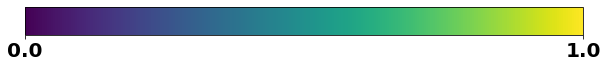

In [107]:
cbar_label_text = ''
cbar = make_horizontal_color_bar(cmap, vmax, vmin, cbar_label_text=cbar_label_text, offset=-0.7)
# plt.savefig('tmp/notebook911/score diff cbar.pdf', bbox_inches="tight")
plt.show()

In [81]:
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('my_colormap',["grey", "y", "r"], N=256) 

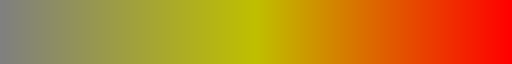

In [82]:
cmap

In [98]:
from  matplotlib.colors import LinearSegmentedColormap
c = ["grey","yellow","red"]
v = [0,.3,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('my_colormap',l, N=256)

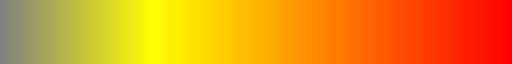

In [99]:
cmap

In [40]:
vertex_data = cortex.VertexRGB(rgb_textures[0], rgb_textures[1], rgb_textures[2], 'fsaverage')

In [46]:
save_fig(vertex_data, f'tmp/notebook911/rgb weights.png')

In [44]:
cortex.webshow(vertex_data)

Started server on port 54490


<JS: window.viewer>

In [35]:
nii = nib.load(tmp_nii_path)

In [38]:
np.asarray(nii.dataobj).shape

(78, 93, 71)

In [21]:
voxel_data = np.zeros(shape=(*voxel_masks.shape, 3))

In [22]:
voxel_data[voxel_masks == 1] = weights

In [28]:
# mean over subjects
d = voxel_masks.sum(0)
d[d == 0] = 1
d = np.stack([d for _ in range(voxel_masks.shape[0])])
# v = voxel_data / d
# v = v.sum(0)

In [30]:
voxel_masks.shape

(10, 78, 93, 71)

In [ ]:
def save_voxel_rgb_as_subject_mean_nii(voxel_masks, voxel_score, example_nii_path, tmp_nii_path):
    
